In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import datetime
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')
import os
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-2bcc3ed11b10>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df = pd.read_csv(r'E:\Okadoc\Data\Monthly_Appointments_Model1.csv')
df.head()

,yearmonth_starttime,Count of id
0,21-Jan,84904
1,21-Feb,163316
2,21-Mar,233879
3,21-Apr,217543
4,21-May,240387


In [3]:
df.describe()

,Count of id
count,38.000000
mean,319930.526316
std,92811.845900
min,84904.000000
25%,270678.250000
50%,313580.500000
75%,368630.750000
max,561231.000000


<AxesSubplot:>

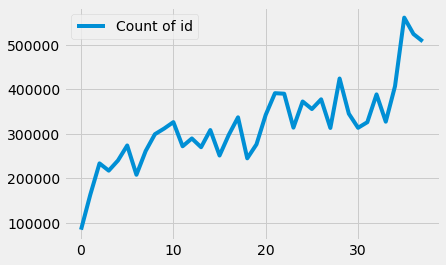

In [4]:
df.plot()

<AxesSubplot:>

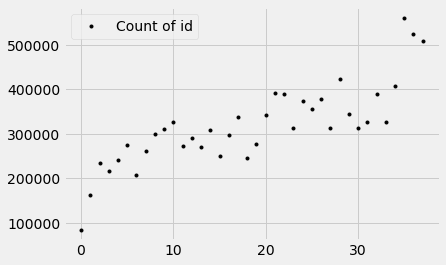

In [5]:
df.plot(style='k.')

In [6]:
df.set_index('yearmonth_starttime',inplace=True)
df.head()

,Count of id
yearmonth_starttime,
21-Jan,84904
21-Feb,163316
21-Mar,233879
21-Apr,217543
21-May,240387


In [35]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]


train_arima = train_data['Count of id']
test_arima = test_data['Count of id']


history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

In [36]:
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

In [37]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 5513770184.913088
MAE: 51668.99900793713
RMSE: 74254.76540204734


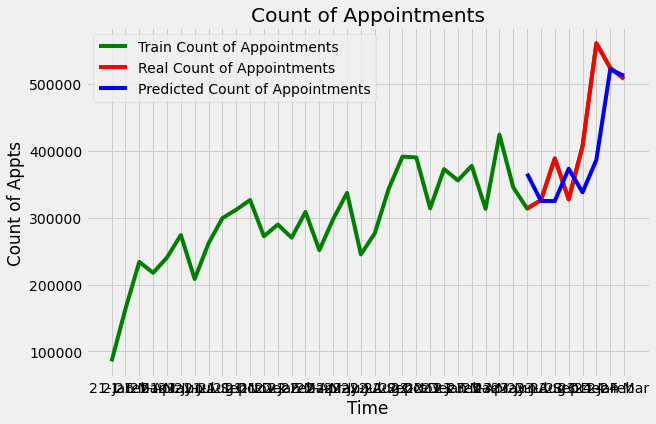

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.plot(df.index[-600:], df['Count of id'].tail(600), color='green', label = 'Train Count of Appointments')
plt.plot(test_data.index, y, color = 'red', label = 'Real Count of Appointments')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Count of Appointments')
plt.title('Count of Appointments')
plt.xlabel('Time')
plt.ylabel('Count of Appts')
plt.legend()
plt.grid(True)
# plt.savefig('arima_model.pdf')
plt.show()

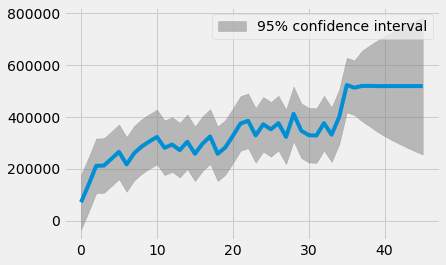

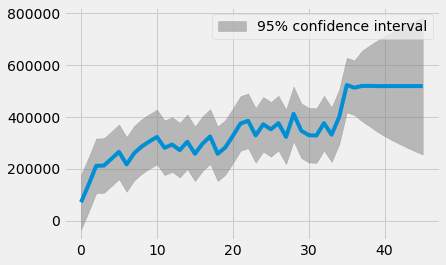

In [39]:
plot_predict(model_fit,1,46)

In [7]:
df1 = pd.read_csv(r'E:\Okadoc\Data\Monthly_Appointments_Model1.csv',index_col=[0],parse_dates=True)
df1.head()

,Count of id
yearmonth_starttime,
21-Jan,84904
21-Feb,163316
21-Mar,233879
21-Apr,217543
21-May,240387


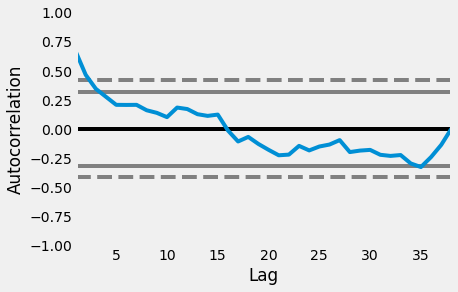

In [8]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
plt.show()

<AxesSubplot:xlabel='yearmonth_starttime'>

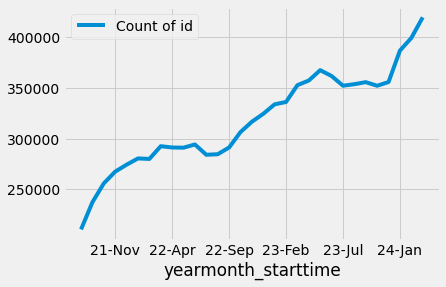

In [9]:
df_ma = df1.rolling(window=8).mean()
df_ma.plot()

In [10]:
df1_base = pd.concat([df1,df1.shift(1)],axis=1)
df1_base.head()

,Count of id,Count of id
yearmonth_starttime,,
21-Jan,84904,NaN
21-Feb,163316,84904.0
21-Mar,233879,163316.0
21-Apr,217543,233879.0
21-May,240387,217543.0


In [11]:
df1_base.dropna(inplace=True)
df1_base.columns = ['Actual_Count','Forecast_Count']

<AxesSubplot:xlabel='yearmonth_starttime'>

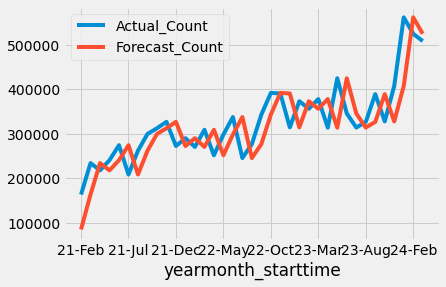

In [12]:
df1_base.plot()

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error
df1_error = mean_squared_error(df1_base.Actual_Count,df1_base.Forecast_Count)
df1_error

3342628973.6216216

In [42]:
# from statsmodels.tsa.api import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
X_train = df1[0:28]
X_test = df1[28:39]

In [43]:
order = (2,0,3)
train,test = df1[0:28],df1[28:39]
predictions = list()
for i in range(len(test)):
    try:
        model = ARIMA(train,order)
        model_fit = model.fit()
        pred_y = model_fit.forecast()[0]
        predictions.append(pred_y)
        error = mean_squared_error(test,predictions)
        print('ARIMA%s RMSE = %.2f'% (order,error))
    except:
        continue
# print(predictions)
# predictions = list()
# # walk-forward validation
# for t in range(len(X_test)):
#      model = ARIMA(X_train, order=(2,0,3))
#      model_fit = model.fit()
#      output = model_fit.forecast()
#      yhat = output[0]
#      predictions.append(yhat)
#      obs = X_test[t]
# #      history.append(obs)
#      print('predicted=%f, expected=%f' % (yhat, obs))
# # evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# pyplot.plot(X_test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

In [44]:
Appt_Model = ARIMA(X_train,order=(2,0,3))
fit = Appt_Model.fit()

C:\Users\H.W\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\H.W\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\H.W\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [45]:
fit.aic

696.5824331920874

In [46]:
df1_forecast = fit.forecast(steps = 10)

C:\Users\H.W\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [47]:
np.sqrt(mean_squared_error(X_test,df1_forecast))

132601.57310288263

C:\Users\H.W\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\H.W\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\H.W\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Count of id   No. Observations:                   38
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -469.742
Date:                Sat, 20 Apr 2024   AIC                            953.484
Time:                        19:16:56   BIC                            964.947
Sample:                             0   HQIC                           957.562
                                 - 38                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.199e+05   1.31e+05      2.442      0.015    6.31e+04    5.77e+05
ar.L1          1.4959      1.468      1.019      0.308      -1.382       4.373
ar.L2         -0.5254      1.411     -0.372      0.7

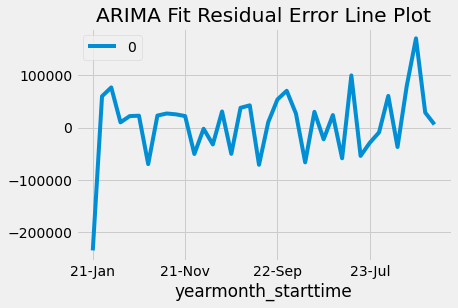

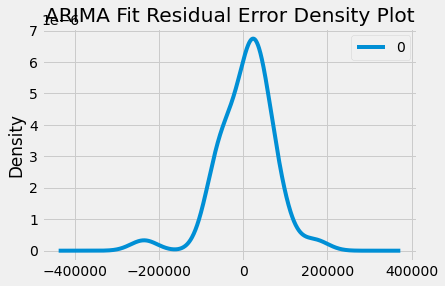

                   0
count      38.000000
mean     7110.949272
std     65799.377172
min   -235026.526308
25%    -31503.846370
50%     22314.072464
75%     36004.229377
max    170593.071704


In [48]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df,order=(2,0,3))
model_fit = model.fit()
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARIMA Fit Residual Error Line Plot')
plt.show()
residuals.plot(kind='kde')
plt.title('ARIMA Fit Residual Error Density Plot')
plt.show()
print(residuals.describe())

In [49]:
p_vals = range(0,4)
d_vals = range(0,3)
q_vals = range(0,4)

In [50]:
for p in p_vals :
    for d in d_vals :
        for q in q_vals :
            order = (p,d,q)
            train,test = df1[0:28],df1[28:39]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train,order)
                    model_fit = model.fit()
                    pred_y = model_fit.forecast()
                    predictions.append(pred_y)
                    error = mean_squared_error(test,predictions)
                    print('ARIMA%s RMSE = %.2f'% (order,error))
                except:
                    continue

C:\Users\H.W\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


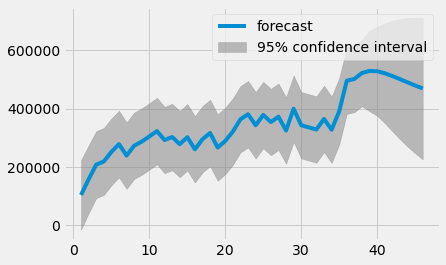

<Figure size 648x432 with 0 Axes>

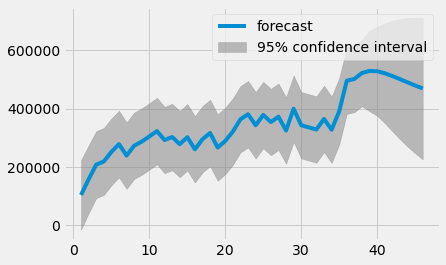

In [54]:
from statsmodels.graphics.tsaplots import plot_predict
# fig, ax = plt.subplots()
# ax = df.loc['23-Jun':]#.plot(ax=ax)
# df.plot()
plot_predict(model_fit,1,46)#,dynamic=True,ax=ax,plot_insample=False)
# plt.savefig('arima_model.png')
# fit.plot_predict(1,47)